In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [8]:
data = data.dropna()
print("Shape of the data is :", data.shape)

Shape of the data is : (699, 2)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [10]:
### SPLITTIN THE DATA ###

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # in conext of the amount of iteration it already has a fixed default value but it also checks for the last ten cost values and if there's not much change in the value then it stops iterating the loop

lr_model.fit(train_input, train_output) # it takes care of all the steps we learned like forward propgation, cost function, gradient descent and iterating all those steps


LinearRegression()

In [12]:
lr_model.coef_ # M VALUE

array([[1.0009993]])

In [13]:
lr_model.intercept_ # C VALUE

array([-0.23603461])

In [14]:
test_predictions = lr_model.predict(test_input) # it will utilise the m and c values found by using the fit function and use it on the test input provided to get the predicted output

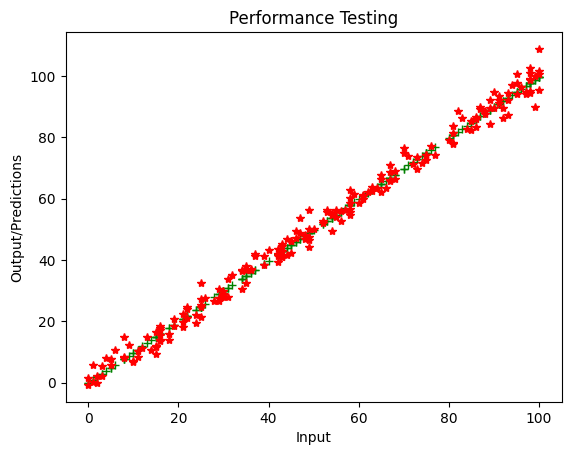

In [16]:
plt.plot(test_input, test_predictions, "+", color='g')
plt.plot(test_input, test_output, "*", color = "r")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error 
### mean squared error = (1/n) sigma i=1 to n (observed output - predicted output)^2

cost = mean_squared_error(test_output, test_predictions)
cost


8.030031591835375